In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from datasets.carla import *
from tools.utils import *
from tools.loss import *

%matplotlib inline
import matplotlib.pyplot as plt

from numpy.linalg import inv

In [49]:
import seaborn as sns

sns.set_style('white')
sns.set_palette('muted')
sns.set_context(
    "notebook",
    font_scale=1.25,
    rc={"lines.linewidth": 2.5}
)

In [28]:
logits = torch.load('../test/2/logits.pt')
labels = torch.load('../test/2/ground_truth.pt')
preds = torch.load('../test/2/preds.pt')
loss = focal_loss(logits, labels, n=2)

In [29]:
labels = labels.argmax(dim=1)
corr = preds.gather(1, labels[None])

In [30]:
logits = logits.numpy()
labels = labels.numpy()
preds = preds.numpy()
loss = loss.numpy()
corr = corr.numpy()

In [89]:
gamma = [0, 0.5, 1, 2, 5]
losses = []

for g in gamma:
    logits = torch.load(f'../test/{g}/logits.pt')
    labels = torch.load(f'../test/{g}/ground_truth.pt')
    preds = torch.load(f'../test/{g}/preds.pt')
    
    loss = focal_loss(logits, labels, n=g)
    labels = labels.argmax(dim=1)
    corr = preds.gather(1, labels[None])
    
    logits = logits.numpy()
    labels = labels.numpy()
    preds = preds.numpy()
    loss = loss.numpy()
    corr = corr.numpy()
    
    thresh = [0., .1, .2, .3, .4, .5, .6, .7, .8, .9, 1., 1.1]
    gloss = []
     
    for i in range(0, 11):
        indices = np.where((corr > thresh[i]) & (corr <= thresh[i+1]))
        gloss.append(loss[indices].mean())
        
    losses.append(gloss)


/tmp/ipykernel_1330640/3849935588.py:24: RuntimeWarning: Mean of empty slice.
  gloss.append(loss[indices].mean())


(0.0, 1.0)

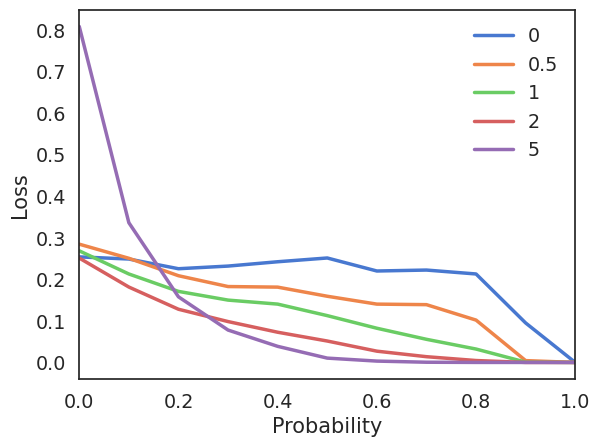

In [92]:


for i, loss in enumerate(losses):
    for j, l in enumerate(loss):
        if np.isnan(l):
            loss[j] = 0;
    plt.plot(thresh[:-1], loss, label=gamma[i])

plt.legend()
plt.xlabel("Probability")
plt.ylabel("Loss")
plt.xlim(0,1)

[[0.25389683,
  0.24874876,
  0.22541232,
  0.23179473,
  0.24219345,
  0.25125334,
  0.21995327,
  0.22221556,
  0.21279365,
  0.094965585,
  nan],
 [0.28448218,
  0.25052235,
  0.20860691,
  0.18255287,
  0.18115513,
  0.15921308,
  0.14029066,
  0.13900903,
  0.10187124,
  0.0044089756,
  nan],
 [0.26848108,
  0.21279684,
  0.1709015,
  0.14995804,
  0.14032465,
  0.11261654,
  0.08227312,
  0.055668056,
  0.03224057,
  0.00074749097,
  nan],
 [0.2510599,
  0.18137182,
  0.12796724,
  0.09833229,
  0.0726837,
  0.051527724,
  0.027141657,
  0.013854269,
  0.0046250876,
  4.7392474e-05,
  nan],
 [0.80812204,
  0.33612615,
  0.1578648,
  0.077918485,
  0.03874891,
  0.010428836,
  0.0032669639,
  0.00053357956,
  4.336869e-05,
  5.7587533e-07,
  nan]]